# Decision Tree Baseline
We run a simple decision tree as baseline. We selected this model because it's the easiest model capable of managing such a high dimensional set of features. Model like logistic regression had convergence problems due to the high amount of variables.

In [42]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection

from numpy import argmax
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
sys.path.append('..')

In [26]:
from helper import data_container

In [27]:
dataset_path = '../dataset/train.csv'

In [28]:
dataset = pd.read_csv(dataset_path)
container = data_container(dataset, drop=False)
df_14 = container.compute_14d_features()

In [29]:
next_col=[col for col in df_14.columns if 'next' in col and not 'aircon' in col]
df_14_drop = df_14.drop(columns=next_col)

In [30]:
df_14_drop = df_14_drop.drop(columns=['aircon_sum_wo_prev14d', 'mean_temperature_prev14d', 'ge_min_persistance_prev14d', 'ge_mean_persistance_prev14d'])

In [31]:
# selecting a set of SITE_IDs to make a test set similar to the given one in the project
site_num = df_14_drop['SITE_ID'].nunique()

site_num_train = site_num*0.8
site_num_train

1656.8000000000002

In [32]:
import random
#splitting the data via SITE_ID
arr_site_id = df_14_drop['SITE_ID'].unique()
random.shuffle(arr_site_id)

site_train = arr_site_id[:1656]
site_test = arr_site_id[-(len(arr_site_id)-1656):]

#Default

In [36]:
df_train = df_14_drop.loc[df_14_drop['SITE_ID'].isin(site_train)]
df_test = df_14_drop.loc[df_14_drop['SITE_ID'].isin(site_test)]

df_train = df_train.drop(columns='SITE_ID')
df_test = df_test.drop(columns='SITE_ID')

df_train = df_train.drop(columns = ['DATE'])
df_test = df_test.drop(columns='DATE')


X_train=df_train.drop(columns=['aircon_sum_target_next14d'])
y_train=df_train['aircon_sum_target_next14d']
X_test=df_test.drop(columns=['aircon_sum_target_next14d'])
y_test=df_test['aircon_sum_target_next14d']

In [37]:
X_train

,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,...,ge_max_persistance_prev14d,power_max_persistance_prev14d,power_min_persistance_prev14d,power_mean_persistance_prev14d,temperature_max_persistance_prev14d,temperature_min_persistance_prev14d,temperature_mean_persistance_prev14d,month,day_sin,day_cos
300,18.0,0,0,0,0,1,0,0,0,0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8.978045e-01,-0.440394
301,18.0,0,0,0,0,1,0,0,0,0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7.907757e-01,-0.612106
302,18.0,0,0,0,0,1,0,0,0,0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,4,6.513725e-01,-0.758758
303,18.0,0,0,0,0,1,0,0,0,0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.853020e-01,-0.874347
304,18.0,0,0,0,0,1,0,0,0,0,...,24.0,133.0,0.0,19.0,0.0,0.0,0.0,4,2.993631e-01,-0.954139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620995,4.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.012985e-01,0.979530
620996,4.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.449294e-16,1.000000
620997,4.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.012985e-01,0.979530
620998,4.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3.943559e-01,0.918958


In [40]:
clf_DecisionTree = DecisionTreeClassifier(random_state=0)
clf_DecisionTree.fit(X_train, y_train)
y_pred = clf_DecisionTree.predict(X_test)

Accuracy:  0.9877028112449799
Precision:  0.03411513859275053
Recall:  0.0487062404870624
F1-score:  0.040125391849529776


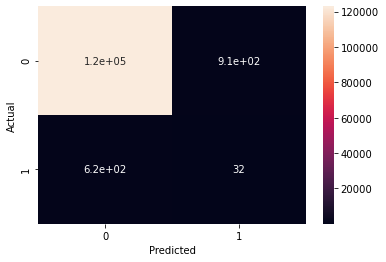

In [43]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Precision: ',metrics.precision_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('F1-score: ',metrics.f1_score(y_test, y_pred))

plt.show()